In [1]:
# git clone package:
# !git clone <path_package>
# or copy package :
!cp -r /kaggle/input/autonlp-git/SentimentML-main /kaggle/working

In [2]:
import os
# directory of package :
fd = os.open("/kaggle/working/SentimentML-main", os.O_RDONLY )
os.fchdir(fd)
os.getcwd()

'/kaggle/working/SentimentML-main'

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 561 kB 292 kB/s 
     |████████████████████████████████| 7.7 MB 4.1 MB/s 
     |████████████████████████████████| 280 kB 62.2 MB/s 
     |████████████████████████████████| 11.6 MB 50.8 MB/s 
     |████████████████████████████████| 85 kB 3.7 MB/s 
     |████████████████████████████████| 80 kB 6.6 MB/s 
     |████████████████████████████████| 23.9 MB 17.0 MB/s 
     |████████████████████████████████| 2.6 MB 23.5 MB/s 
     |████████████████████████████████| 283 kB 25.7 MB/s 
     |████████████████████████████████| 70 kB 7.3 MB/s 
     |████████████████████████████████| 10.8 MB 23.3 MB/s 
     |████████████████████████████████| 301 kB 24.4 MB/s 
     |████████████████████████████████| 166.7 MB 17 kB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 12.8 MB 27.3 MB/s 
     |████████████████████████████████| 394.3 MB 9.7 kB/s 
     |████████████████████████████████| 47.5 MB 11.9 MB/s 
     |████████████

In [4]:
!pip install -U sentence-transformers

  Using cached sentence_transformers-2.0.0-py3-none-any.whl
     |████████████████████████████████| 2.9 MB 288 kB/s 
  Using cached huggingface_hub-0.0.17-py3-none-any.whl (52 kB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.0.1
    Uninstalling transformers-4.0.1:
      Successfully uninstalled transformers-4.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 1.3.0 requires transformers<4.1,>=4.0, but you have transformers 4.11.0 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
# if png doesn't save correctly
!pip install kaleido

     |████████████████████████████████| 79.9 MB 181 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [6]:
# if spacy can't load spacy model :
!python3 -m spacy download fr_core_news_md

⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
     |████████████████████████████████| 46.1 MB 25.4 MB/s 
  Created wheel for fr-core-news-md: filename=fr_core_news_md-2.3.0-py3-none-any.whl size=46100669 sha256=318207ea025201151082112fd7a1ae48b6ccb6117a15d5525948971e9688b615
  Stored in directory: /tmp/pip-ephem-wheel-cache-i3drr1c0/wheels/62/a5/93/9c82d8ae84430ed80720262c11726d046d3444af301b7d2895
Successfully built fr-core-news-md
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


# Import

In [7]:
import pandas as pd
from autonlp.autonlp import AutoNLP
import os
from pathlib import Path
from autonlp.flags import Flags, save_yaml
import dataclasses

# Flags update (parameters)

In [8]:
#####################
# Parameters
#####################

flags_dict_info = {
    "path_data": "/kaggle/input/finance-corpus/FinancialPhraseBank_train.csv",
    "path_data_validation": "",
    "apply_logs": True,
    "outdir": "/kaggle/working/logs",
    "seed": 15,
    "debug": False,  # for debug : use only 50 data rows for training
}
flags_dict_preprocessing = {
    "column_text": "text_fr",  # name column with texts
    "target": "sentiment",     # name column with targets
    "language_text": "fr",
    "apply_small_clean": True,
    "name_spacy_model": "fr_core_news_md",
    "apply_spacy_preprocessing": True,
    "apply_entity_preprocessing": True
}

flags_dict_autonlp = {
    "objective": 'multi-class',    # 'binary' or 'multi-class' or 'regression'
    
    "embedding": {"tf": 1, "tf-idf": 3, "word2vec": None, "fasttext": 2, "doc2vec": None, "transformer": None},

    "clustering": {"NMF_frobenius": [], "NMF_kullback": [3], "LDA": [1],
                   "hdbscan": [], "ACP_hdbscan": [], "UMAP_hdbscan": [],
                   "kmeans": [], "ACP_kmeans": [], "UMAP_kmeans": [],
                   "agglomerativeclustering": [], "ACP_agglomerativeclustering": [], "UMAP_agglomerativeclustering": [],
                   "Similarity_voc": [2], "zero-shot":[]},
    
    "n_groups": 20,
    
    "frac_trainset": 1,
    "scoring": 'f1',
    "average_scoring": "macro",
    
    "verbose": 2,
    "method_embedding": {'Word2vec': '/kaggle/input/word2vec-french/frwiki.gensim',
                         'Fasttext': '/kaggle/input/fasttext-french-2b-300d/cc.fr.300.vec',
                         'Doc2Vec': 'Doc2Vec',
                         'Transformer': 'sentence-bert',
                         'spacy': [("all", False)]},
    
    "tr_maxlen": 100,
    
    "show_top_terms_topics": True,
    "preprocess_topic": (['ADJ', 'NOUN', 'VERB'], True),
    "n_top_words": 10,
    "min_ngram": 2,
    "max_ngram": 3
    
}

flags_dict_clustering = {
    # NMF
    "alpha_nmf": 0.1,
    "l1_ratio": 0.5,
    # LDA
    "max_iter_lda": 5,
    # ACP
    "acp_n_components": 2,
    # UMAP
    "umap_n_components": 2,
    "umap_n_neighbors": 15,
    # HDBSCAN
    "min_cluster_size": 15,
    # AgglomerativeClustering
    "aglc_linkage": "ward",  # 'ward', 'complete', 'average', 'single'

    ## unsupervised
    "vocabulary_labels": {"positive": ["positif", "avantage", "remporté", "gagné"],
                          "neutral": ["neutre"],
                          "negative": ["négatif", "mauvais", "inconvénient", "perdu", "tombé", "baisse"]}
}

flags_dict_display = {
    "sort_leaderboard": 'f1'
}

flags = Flags().update(flags_dict_info)
flags = flags.update(flags_dict_preprocessing)
flags = flags.update(flags_dict_autonlp)
flags = flags.update(flags_dict_clustering)
flags = flags.update(flags_dict_display)
print("flags :", flags)
debug = flags.debug
outdir = Path(flags.outdir)
os.makedirs(str(outdir), exist_ok=True)
flags_dict = dataclasses.asdict(flags)
save_yaml(outdir / "flags.yaml", flags_dict)

flags : Flags(path_data='/kaggle/input/finance-corpus/FinancialPhraseBank_train.csv', path_data_validation='', apply_logs=True, outdir='/kaggle/working/logs', apply_mlflow=False, experiment_name='Experiment', apply_app=False, debug=False, seed=15, column_text='text_fr', language_text='fr', target='sentiment', apply_small_clean=True, name_spacy_model='fr_core_news_md', apply_spacy_preprocessing=True, apply_entity_preprocessing=True, objective='multi-class', embedding={'tf': 1, 'tf-idf': 3, 'word2vec': None, 'fasttext': 2, 'doc2vec': None, 'transformer': None}, classifier={'Naive_Bayes': [1], 'Logistic_Regression': [2], 'SGD_Classifier': [], 'XGBoost': [], 'Global_Average': [], 'Attention': [], 'BiRNN': [], 'BiRNN_Attention': [], 'biLSTM': [], 'BiLSTM_Attention': [], 'biGRU': [], 'BiGRU_Attention': []}, regressor={'SGD_Regressor': [1], 'XGBoost': [], 'Global_Average': [2], 'Attention': [], 'BiRNN': [], 'BiRNN_Attention': [], 'biLSTM': [], 'BiLSTM_Attention': [], 'biGRU': [], 'BiGRU_Atten

# Instantiation

In [9]:
autonlp = AutoNLP(flags)

# Preprocessing

In [10]:
%%time
autonlp.data_preprocessing()


Read data...

Begin preparation of 3876 data :

Training set size : 3876
Test set size : 0

Begin preprocessing of 3876 train data :
⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')
- Apply small clean of texts...
- Apply nlp.pipe from spacy...
- Apply entities preprocessing...
CPU times: user 18.6 s, sys: 1.28 s, total: 19.9 s
Wall time: 26.8 s


# Training


Fit and Transform Clustering :
List of Clustering : ['tf+LDA', 'fasttext+Similarity_voc', 'tf-idf+NMF_kullback']

tf+LDA Clustering...
LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=20,
                          random_state=15)
Documents associated with no topic : 0.0 %

Value counts labels :
6     690
12    685
11    361
19    228
15    206
1     186
4     179
3     172
13    161
2     142
18    116
16    110
17    104
14    103
9      90
8      88
10     77
0      71
5      66
7      41
dtype: int64
Topic 0: étroit collaboration - trimestre consécutif - générer trimestre - générer trimestre consécutif - consommation carburant - interface utilisateur - desservir client - janvier million action - janvier million - mettre niveau
Topic 1: long terme - tekla structure - achever fin - devoir achever - stratégie croissance - avoir lieu - compétitivité entreprise - devoir achever fin - unité distribution - service ligne
Topic 2: conseil administration - assemb

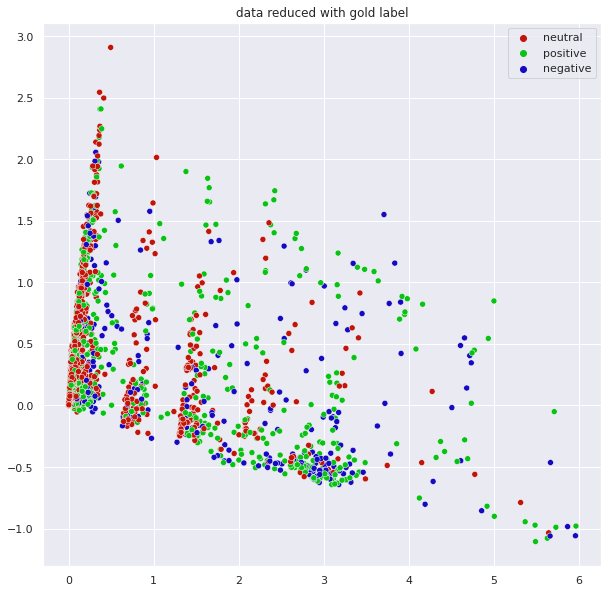

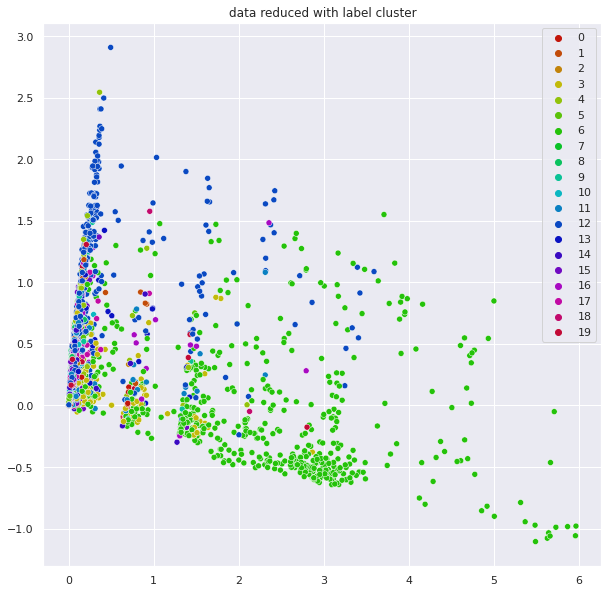

Distribution y_true
neutral     2302
positive    1088
negative     486
dtype: int64
The most common label for cluster 0 is neutral and the label from vocabulary dictionary is positive
The most common label for cluster 1 is neutral and the label from vocabulary dictionary is positive
The most common label for cluster 2 is neutral and the label from vocabulary dictionary is positive
The most common label for cluster 3 is positive and the label from vocabulary dictionary is neutral
The most common label for cluster 4 is neutral and the label from vocabulary dictionary is positive
The most common label for cluster 5 is neutral and the label from vocabulary dictionary is positive
The most common label for cluster 6 is positive and the label from vocabulary dictionary is negative
The most common label for cluster 7 is neutral and the label from vocabulary dictionary is positive
The most common label for cluster 8 is neutral and the label from vocabulary dictionary is positive
The most common

3876it [00:00, 8948.96it/s]
4it [00:00, 13273.11it/s]
1it [00:00, 6052.39it/s]
6it [00:00, 18209.71it/s]


Topic negative: million euro - élevé million - élevé million euro - action ep - euro million - baisse rapport - million euro million - hausse rapport - rapport million euro - rapport million
Topic neutral: société finlandais - conseil administration - siège social - employer personne - signer accord - faire partie - directeur général - plate forme - fournir service - gaz naturel
Topic positive: million euro - euro million - million euro million - euro million euro - vente net - million dollar - bénéfice exploitation - élevé million - élevé million euro - chiffre affaire


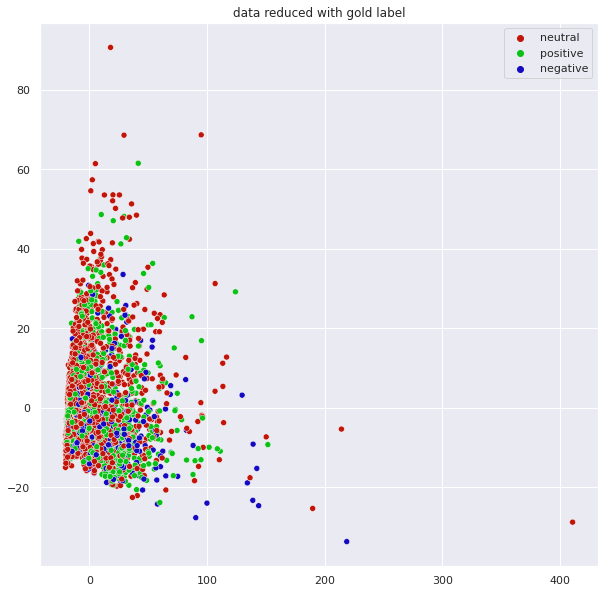

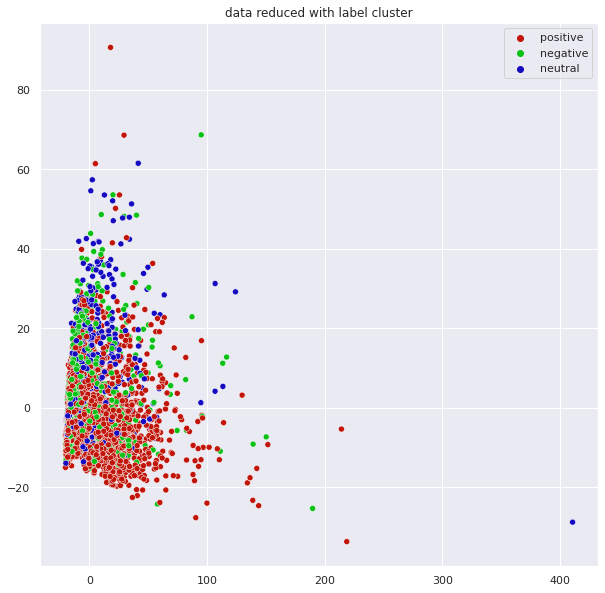

4it [00:00, 14847.09it/s]
1it [00:00, 7639.90it/s]
6it [00:00, 24793.92it/s]

Distribution y_true
neutral     2302
positive    1088
negative     486
dtype: int64
The most common label for cluster negative is neutral and the label from vocabulary dictionary is negative
The most common label for cluster neutral is neutral and the label from vocabulary dictionary is neutral
The most common label for cluster positive is neutral and the label from vocabulary dictionary is positive

Scores :
accuracy = 0.5939
precision macro = 0.198
recall macro = 0.3333
f1 score macro = 0.2484



tf-idf+NMF_kullback Clustering...


NMF(alpha=0.1, beta_loss='kullback-leibler', l1_ratio=0.5, max_iter=1000,
    n_components=20, random_state=1, solver='mu')
Documents associated with no topic : 0.2 %

Value counts labels :
 0     346
 16    339
 8     260
 17    223
 5     204
 19    202
 18    193
 13    193
 3     185
 15    174
 12    172
 11    172
 10    170
 14    163
 4     156
 6     153
 7     151
 2     146
 1     143
 9     122
-1       9
dtype: int64
Topic 0: million euro - euro million - million euro million - euro million euro - élevé million - élevé million euro - bénéfice exploitation - période correspondant - passer million euro - passer million
Topic 1: eur eur - action ep - gain action - gain action ep - eur action - passer eur - passer eur eur - conseil administration - rapport eur - ep passer eur
Topic 2: faire partie - million dollar - million euro - banque coopératif - compagnie assurance - secteur activité - obtenir approbation - participation pourcent - signer accord - investissement nordique


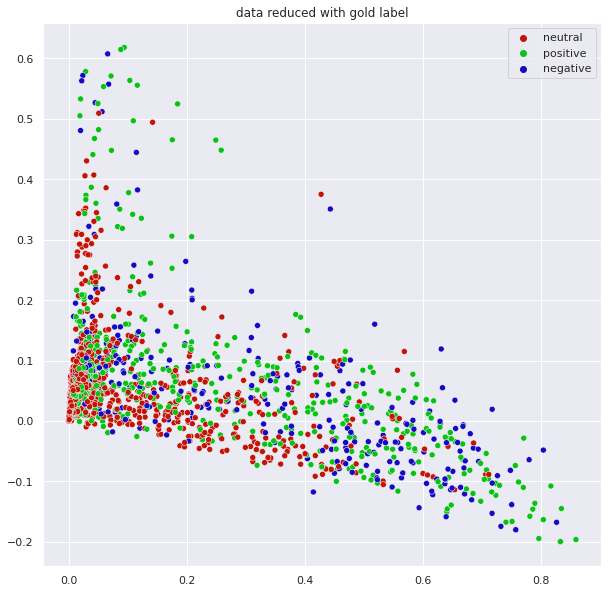

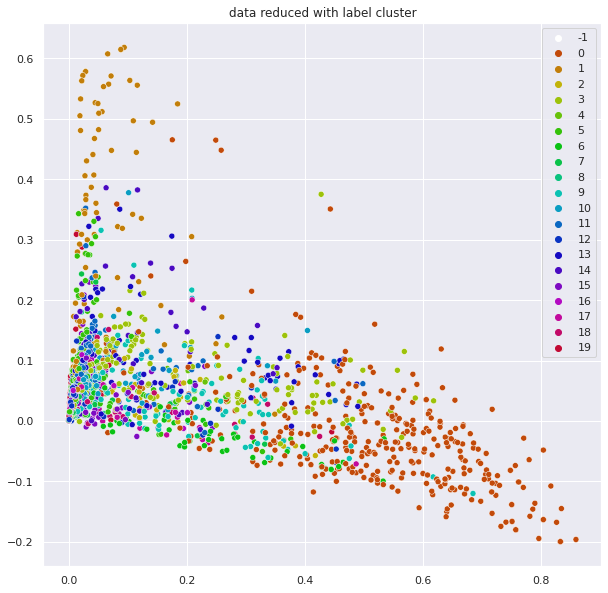

Distribution y_true
neutral     2302
positive    1088
negative     486
dtype: int64
The most common label for cluster -1 is neutral and the label from vocabulary dictionary is positive
The most common label for cluster 0 is positive and the label from vocabulary dictionary is negative
The most common label for cluster 1 is neutral and the label from vocabulary dictionary is negative
The most common label for cluster 2 is neutral and the label from vocabulary dictionary is positive
The most common label for cluster 3 is positive and the label from vocabulary dictionary is positive
The most common label for cluster 4 is neutral and the label from vocabulary dictionary is positive
The most common label for cluster 5 is neutral and the label from vocabulary dictionary is negative
The most common label for cluster 6 is neutral and the label from vocabulary dictionary is neutral
The most common label for cluster 7 is neutral and the label from vocabulary dictionary is negative
The most commo

In [11]:
dict_clustering_train = autonlp.fit_transform_clustering()

# Leaderboard (Validation score)

In [12]:
leaderboard_val = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='val')
print('\nValidation Leaderboard')
leaderboard_val.to_csv(os.path.join(flags.outdir,'leaderboard_val.csv'), index=False)
leaderboard_val


Validation Leaderboard


,name,accuracy_val,recall_macro_val,precision_macro_val,f1_macro_val
0,tf+LDA,0.6117,0.3994,0.3580,0.3725
2,tf-idf+NMF_kullback,0.6380,0.4006,0.3853,0.3692
1,fasttext+Similarity_voc,0.5939,0.3333,0.1980,0.2484


# Testing on other test set

In [13]:
data_test = pd.read_csv("/kaggle/input/finance-corpus/FinancialPhraseBank_test.csv")

In [14]:
X_test, doc_spacy_data_test, Y_test = autonlp.preprocess_test_data(data_test)

- Apply small clean of texts...
- Apply nlp.pipe from spacy...
- Apply entities preprocessing...


In [15]:
name_logs = 'last_logs'
on_test_data = False
dict_clustering_test = autonlp.transform_clustering(name_logs=name_logs, on_test_data=on_test_data, x = X_test, y=Y_test,
                       doc_spacy_data_test = doc_spacy_data_test)


Transform Clustering :

tf+LDA Clustering...
Documents associated with no topic : 0.0 %

Value counts labels :
12    256
6     198
11    106
4      53
19     52
15     46
3      43
13     33
1      31
2      28
17     22
8      18
14     17
0      14
16     13
18     13
5      12
9      10
10      3
7       1
dtype: int64
Distribution y_true
neutral     576
positive    275
negative    118
dtype: int64

Scores :
accuracy = 0.6006
precision macro = 0.3525
recall macro = 0.3957
f1 score macro = 0.3702



fasttext+Similarity_voc Clustering...


969it [00:00, 13137.58it/s]

Distribution y_true
neutral     576
positive    275
negative    118
dtype: int64

Scores :
accuracy = 0.5944
precision macro = 0.1981
recall macro = 0.3333
f1 score macro = 0.2485



tf-idf+NMF_kullback Clustering...


Documents associated with no topic : 0.6 %

Value counts labels :
 0     93
 16    71
 8     70
 3     65
 5     59
 11    55
 4     46
 7     46
 14    44
 17    43
 2     42
 18    42
 13    40
 19    39
 10    39
 1     38
 15    36
 6     36
 9     31
 12    28
-1      6
dtype: int64
Distribution y_true
neutral     576
positive    275
negative    118
dtype: int64

Scores :
accuracy = 0.6275
precision macro = 0.3688
recall macro = 0.3962
f1 score macro = 0.3664




In [16]:
leaderboard_test = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='test') #, info_models=autonlp.info_models)
print('\nTest Leaderboard')
leaderboard_test


Test Leaderboard


,name,accuracy_test,recall_macro_test,precision_macro_test,f1_macro_test
0,tf+LDA,0.6006,0.3957,0.3525,0.3702
2,tf-idf+NMF_kullback,0.6275,0.3962,0.3688,0.3664
1,fasttext+Similarity_voc,0.5944,0.3333,0.1981,0.2485
